 ## <center>Practicing Machine Learning</center>
### <center> A deep dive into Regression </center>
##### <center> Recommended Source: <a href="https://www.amazon.com/-/es/Aur%C3%A9lien-G%C3%A9ron/dp/1492032646/ref=sr_1_fkmr1_1?__mk_es_US=%C3%85M%C3%85%C5%BD%C3%95%C3%91&crid=2Y7BISU0SQYCV&keywords=hand+son+machine+learning+tensorflow+keras&qid=1664596219&qu=eyJxc2MiOiIwLjkzIiwicXNhIjoiMC4wMCIsInFzcCI6IjAuMDAifQ%3D%3D&sprefix=hand+son+machine+learning+tensorflow+keras%2Caps%2C105&sr=8-1-fkmr1">Link</a></center>

Training ML models is fun and all but what is behind these black boxes that we call models?. It is of great importance to have a clear understanding of what is happening in order to have explainable models in production, remember that having a good understanding of what is under the hood can help you quickly choose the appropriate model.

In this notebook we will do a deep dive on how ML works under the hood in regression techniques like linear regression and polinomial regression, we will also explain what gradient descent is.


## Linear Regression

#### <center>$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n$</center>
where:
<div>
     <li>"$y$" represents the predicted value</li>
     <li>"$n$" represents the number of features</li>
     <li>"$x_{i}$" represents is the $i^{th}$ feature value</li>
     <li>"$\beta_{j}$" represents is the $j^{th}$ model parameter</li>
</div>
This can be written in a concise way by vectorizing as follows:

#### <center>$\mathbf{y} = \mathbf{X} \boldsymbol{\beta} + \boldsymbol{\epsilon}$</center>
<div>
    <li>$\mathbf{X}$ is a n x k matrix representing the independent variables, where n is the number of observations and k is the number of features.</li>
    <li>$\boldsymbol{\beta}$ is a k x 1 vector representing the coefficients of the features.</li>
    <li>$\boldsymbol{\epsilon}$ is a n x 1 vector representing the error term.</li>
</div>

Interesting Huh?
But...
How do we train it?

Remember that training a model requires setting parameters so that the model fits the training set. So how do we now how well or poorly our model will fit? Well for that me have our evaluation metric "Root Mean Squared Error" to aid us check the error from the predicted value to the actual (labelled) value.

if we look into the equation for RMSE.

####  <center>$RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (\hat{y}_{i} - y_{i})^2}$</center>
<div>
    <li>$n$ is the number of observations.</li>
    <li>$\hat{y}_{i}$ is the predicted value of the dependent variable for the ith observation.</li>
    <li>$y_{i}$ is the actual value of the dependent variable for the ith observation.</li>
</div>

### The Normal Equation
The N.E. is a function that finds the value of $\beta$ that minimizes the cost function
####  <center>$\boldsymbol{\hat{\beta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
$</center>
<div>
    <li>$\hat{\beta}$ is the value that minimizes the cost function.</li>
    <li>$y$ is the vector of target values containing $y^{(1)}$ $y^{(m)}$.</li>
    <li>$\mathbf{X}$  is a n x k matrix representing the independent variables, where n is the number of observations and k is the number of features.</li>
</div>
Check out the following python implementation using numpy:


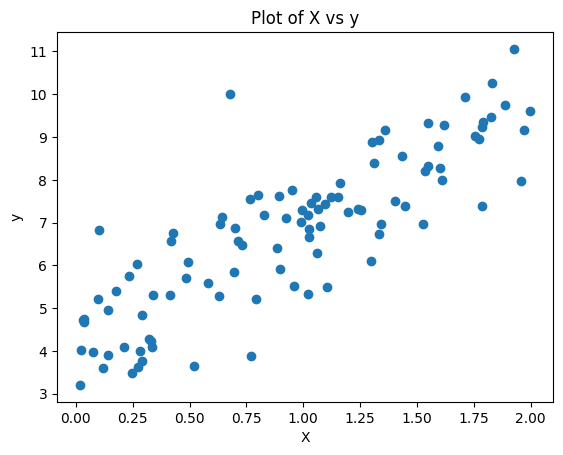

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Example data for X and y as numpy arrays
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100, 1)
# Plot the data
plt.plot(X, y, 'o')

# Add labels and title to the plot
plt.xlabel('X')
plt.ylabel('y')
plt.title('Plot of X vs y')

# Show the plot
plt.show()

Now let's compute $\beta$ using numpy and the normal equation

In [3]:
X_b = np.c_[np.ones((100,1)), X] # add x0 = 1 to each instance
XtX_inv = np.linalg.inv(X_b.T.dot(X_b))
beta_test = XtX_inv.dot(X_b.T).dot(y)
beta_test


array([[4.10425166],
       [3.01443638]])

For the function:

### <center>$y = 4 + 3X_{1} + Gaussian Noise$</center>

We found beta values using the N.E. of $\beta_{0} = 4.04$ and $\beta_{1} = 2.85$ rather than $\beta_{0} = 4$ and $\beta_{1} = 3$, this is due to the noise we inputted to the function before applying the N.E.

Now we can make predictions using  $\hat{\beta}$

In [7]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new] # add X_0 = 1 to each value
y_predict = X_new_b.dot(beta_test)
y_predict

array([[ 4.10425166],
       [10.13312442]])

Lets plot this model's predictions:

In [8]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X,y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

NameError: name 'plt' is not defined

Let's do this using Scikit-learn's linear regression:

In [9]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.10425166]), array([[3.01443638]]))

In [10]:
lin_reg.predict(X_new)

array([[ 4.10425166],
       [10.13312442]])

in Scikit-learn Linear Regression is based on the 'scipy.linalg.lstsq()' (least squares function) which you can call directly as follows:

In [11]:
beta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
beta_best_svd

array([[4.10425166],
       [3.01443638]])

This function computes $\hat{\beta} = (X^+)y$ where $X^+$ is the pseudo inverse of X, we can do this directly using np.linalg.pinv() as follows:

In [12]:
np.linalg.pinv(X_b).dot(y)

array([[4.10425166],
       [3.01443638]])

In [13]:
import numpy as np
eta = 0.1 #lr
n_iterations = 1000
m = 100

X_b = np.c_[np.ones((100,1)), X] # add x0 = 1 to each instance
theta = np.random.randn(2,1) # random initialization
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta * gradients
theta

array([[4.10425166],
       [3.01443638]])

   id
0   0
1   1
2   2
3   3
4   4
5   5
6   6
7   7
8   8
9   9
